In [62]:
%matplotlib inline
from matplotlib import pyplot as plt
from operator import itemgetter

In [46]:
def extractLines(filename, prefix):
    rollback = []
    ret = [[] for k in prefix]
    with open(filename) as f:
        lineId = 0
        for line in f:
            line = line.strip()
            if line.startswith("Rollback"):
                a, b = line[33:-6].split(" nodes to ")
                diff = int(a) - int(b)
                rollback.append((lineId - diff, lineId))
            else:
                for idx, s in enumerate(prefix):
                    if line.startswith(s):
                        ret[idx].append(line)
                        lineId = max(lineId, len(ret[idx]))
    return ret, rollback

In [47]:
def extractNums(linesList, pos=-1):
    ret = []
    for ll in linesList:
        ret.append([float(t.split()[pos]) for t in ll])
    return ret

In [56]:
def plot(zipLabels, nums, vlines=None, xlim=None, ylim=None, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(8, 4))
    for idx, label in zipLabels:
        plt.plot(range(1, len(nums[idx]) + 1), nums[idx], label=label)
    plt.grid()
    plt.legend(loc=(1, 0))
    if vlines:
        for a, b in vlines:
            plt.axvline(a, c='blue', ls="dashed")
            plt.axvline(b, c='red')
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

In [49]:
labels = ["Training auPRC", "Testing auPRC", "Testing (ref) auPRC",
          "Training average score =", "Training average score (positive)",
          "Training average score (negative)",
          "Testing average score =", "Testing average score (positive)",
          "Testing average score (negative)",
          "Testing (ref) average score =", "Testing (ref) average score (positive)",
          "Testing (ref) average score (negative)",
          "Effective count", "Positive effective count", "Negative effective count"]

In [50]:
lines, rollback1 = extractLines("splice-site/auto/result-010.txt", labels)
nums = extractNums(lines)

'''
joint = [a + b + c + d + e
         for a, b, c, d, e in zip(numsL2, numsL2L3, numsL2L3_2, numsL2L3_3, numsL2L3L3)]
'''
joint1 = nums

In [51]:
lines, rollback2 = extractLines("splice-site/auto/result-002.txt", labels)
nums = extractNums(lines)

'''
joint = [a + b + c + d + e
         for a, b, c, d, e in zip(numsL2, numsL2L3, numsL2L3_2, numsL2L3_3, numsL2L3L3)]
'''
joint2 = nums

In [57]:
from math import isnan

for nums in [joint1, joint2]:
    for idx in [2, 9, 10, 11]:
        last = nums[idx][0]
        for j in range(len(nums[idx])):
            if isnan(nums[idx][j]):
                nums[idx][j] = last
            else:
                last = nums[idx][j]

# Note

The segments between blue dashed vertical lines and the red lines are where algorithm think overfitting happends. Tree nodes generated within these segments were removed from the alternative decision tree.

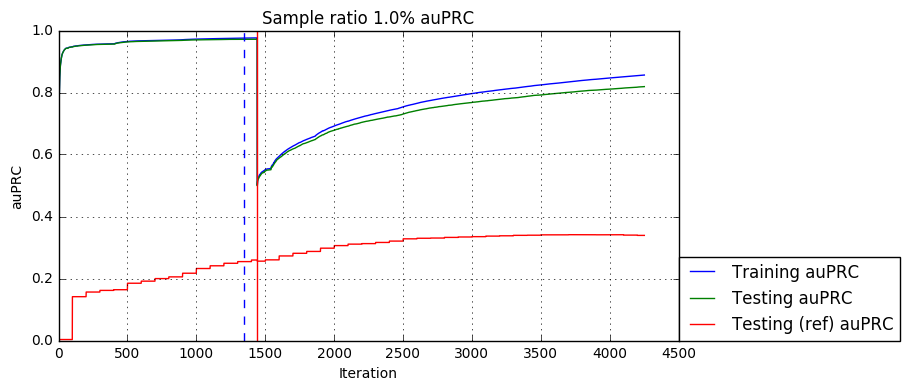

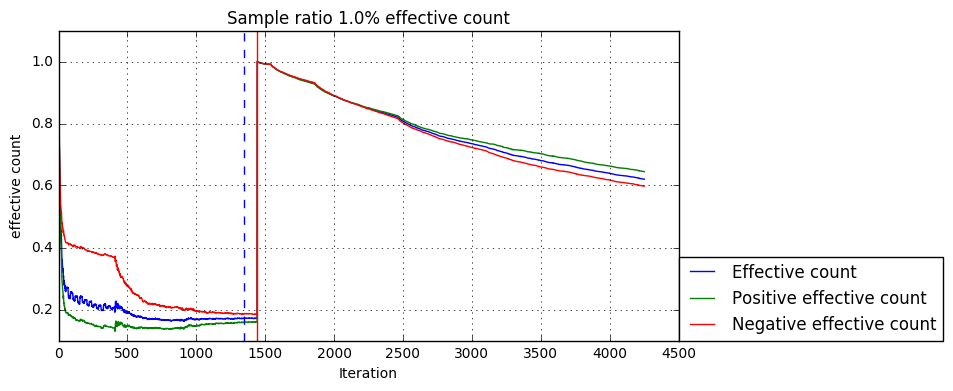

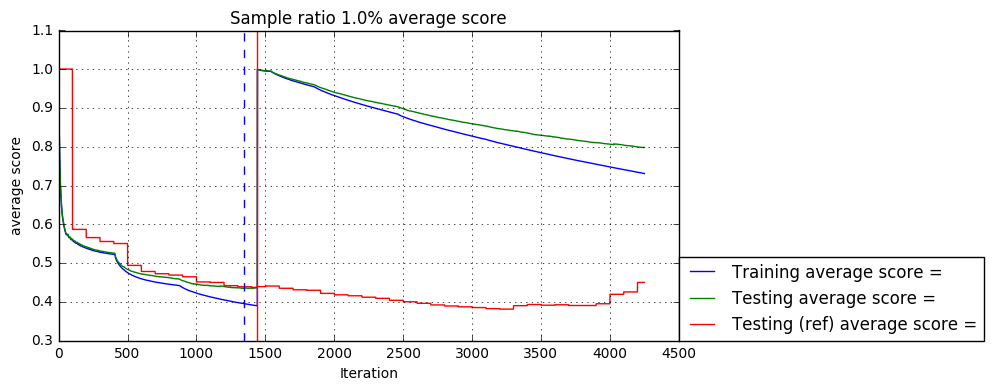

In [58]:
joint = joint1
vlines = rollback1

ZOOM = False

sampleRatio = 1.0

if ZOOM:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         xlim=[90, 105], ylim=[0.0, 1.0])
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         xlim=[4000, 5500], ylim=[0.0, 1.0])
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         xlim=[3349, 4300], ylim=[0.7, 0.85])
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
else:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% auPRC", xlabel="Iteration", ylabel="auPRC")  # auPRC
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% effective count",
         xlabel="Iteration", ylabel="effective count")  # auPRC
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% average score",
         xlabel="Iteration", ylabel="average score")  # scores
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines)  # scores (pos)
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines)  # scores (neg)

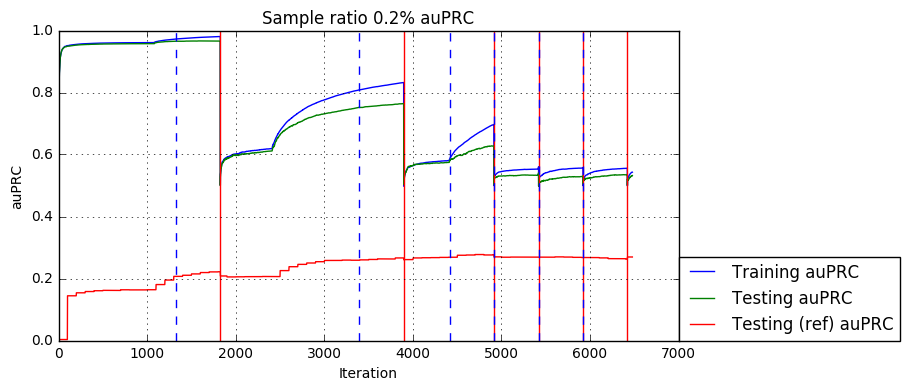

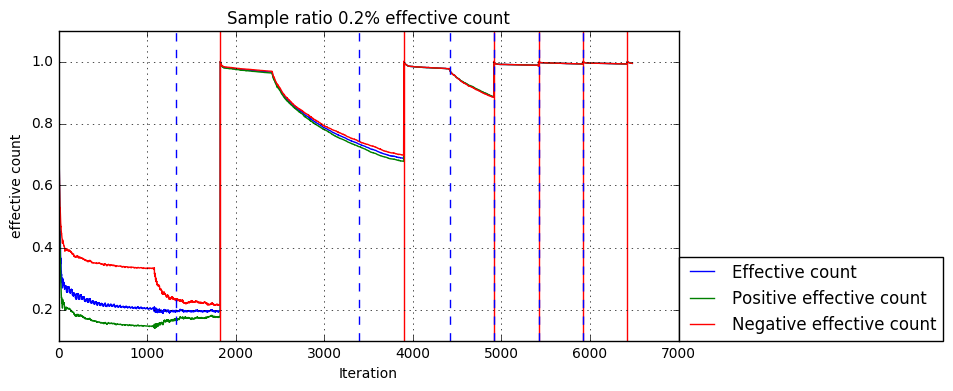

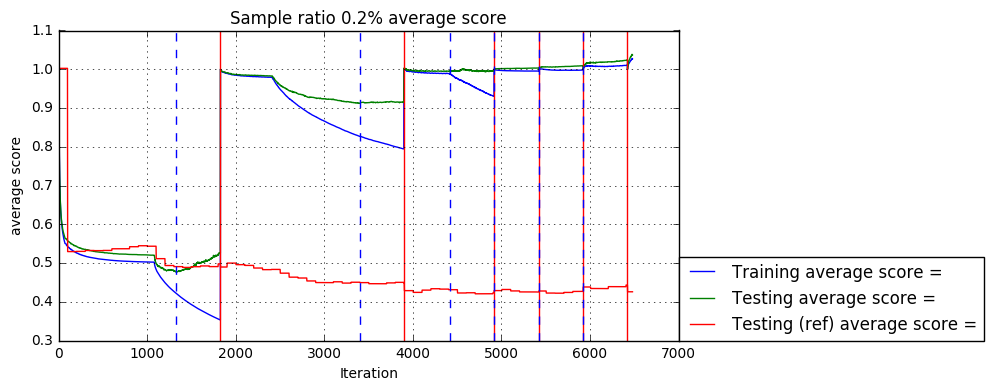

In [59]:
joint = joint2
vlines = rollback2
ZOOM = False

sampleRatio = 0.2

if ZOOM:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         xlim=[90, 105], ylim=[0.0, 1.0])
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         xlim=[4000, 5500], ylim=[0.0, 1.0])
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         xlim=[3349, 4300], ylim=[0.7, 0.85])
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines,
    #      xlim=[0, 5000], ylim=[0.0, 1.0])
else:
    plot(zip(range(3), labels[:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% auPRC", xlabel="Iteration", ylabel="auPRC")  # auPRC
    plot(zip(range(-3, 0), labels[-3:]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% effective count",
         xlabel="Iteration", ylabel="effective count")  # auPRC
    plot(zip(range(3, len(labels), 3), labels[3:-3:3]), joint, vlines=vlines,
         title="Sample ratio " + str(sampleRatio) + "% average score",
         xlabel="Iteration", ylabel="average score")  # scores
    # plot(zip(range(4, len(labels), 3), labels[4:-3:3]), joint, vlines=vlines)  # scores (pos)
    # plot(zip(range(5, len(labels), 3), labels[5:-3:3]), joint, vlines=vlines)  # scores (neg)

## PR Improvement

In [69]:
# file generation:
#   grep 'Node\|Testing (ref) PR =\|Testing (ref) auPRC = 0' result-010.txt > testPR.txt

def parse(s):
    pairs = map(lambda t: t.split(','),
                s[1:-1].split("), ("))
    return [(float(a), float(b)) for a, b in pairs]

def extractTestInfo(filename):
    ret = []
    with open(filename) as f:
        curNode = 0
        for line in f:
            line = line.strip()
            if line.startswith("Node"):
                curNode = int(line.split()[1])
            elif line.startswith("Testing (ref) auPRC"):
                auPRC = float(line.split('=')[1])
            elif line.startswith("Testing (ref) PR") and curNode % 1000 < 5:
                begin = line.find(" = List(") + 8
                pr = parse(line.strip()[begin:-1])
                ret.append((curNode, auPRC, pr))
    return ret

def plot(data):
    plt.figure(figsize=(10, 10))
    for node, au, pr in data:
        x = map(itemgetter(0), pr)
        y = map(itemgetter(1), pr)
        if y[0] == 1.0:
            y[0] = y[1]
        plt.xlim(0.0, 0.2)
        # plt.ylim(0.95, 1.0)
        plt.plot(x, y, label="Iteration: " + str(node) + ": %.4f" % (au))
        plt.grid()
        plt.xlabel("recall")
        plt.ylabel("preceision")
        plt.legend(loc=(1, 0))
        plt.title("Precision-Recall curve after every 1000 iterations")

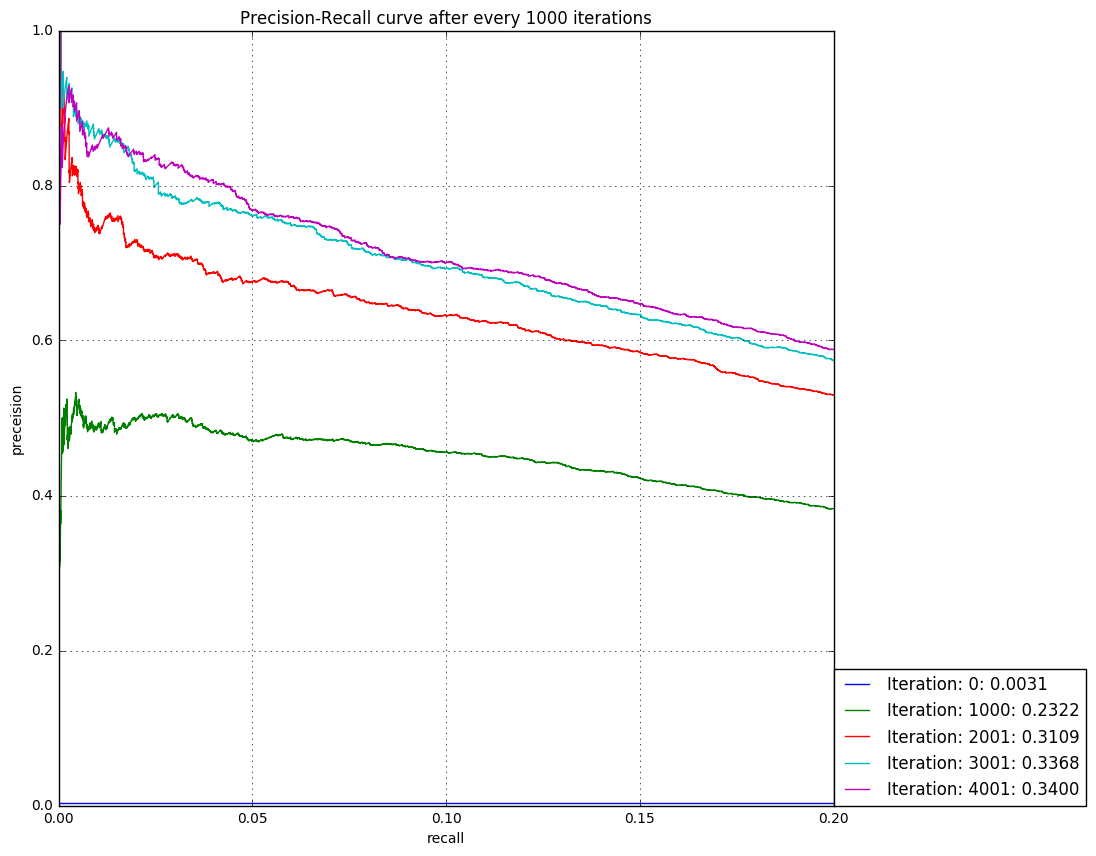

In [70]:
# data = extractTestInfo("splice-site/auto/testPR.txt")
plot(data)